In [174]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClusterMixin


In [175]:
involvement_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                           'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 
                           'Funding', 'Application-Oriented', 'Number of Members', 
                           'Academic Collaborations', 'System Maturity', 'Demos', 'Industrial Collaborations']

In [47]:
industry_cols = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']

In [48]:
comp_cols = ['Number of Members', 'Application-Oriented', 'Academic Collaborations', 
                      'System Maturity', 'Demos', 'Industrial Collaborations']

In [176]:
feature_weights = {
    'Security': 1.0, 'Humanities': 1.0, 'Nat. Sci': 1.0, 'Health': 1.0, 'AI Ethics': 1.0, 'Big Data': 1.0, 'Robotics': 1.0, 
    'Documents': 1.0, 'Multimedia': 1.0, 'NLP': 1.0, 'KRR': 1.0, 'Graphs': 1.0, 'DL/ML': 1.0, 
    'Number of Members': 0.5, 'Application-Oriented': 0.5, 'Academic Collaborations': 0.5, 'System Maturity': 0.5, 
    'Demos': 0.5, 'Industrial Collaborations': 0.5
}

In [190]:
"""
    Loads and preprocesses the team activity data from a CSV file.

    Parameters:
    - file_path (str): The path to the CSV file containing the team activity data.

    Returns:
    - df (DataFrame): A preprocessed DataFrame with involvement levels converted to numerical values.
    """
# Load and preprocess the data

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, index_col=0).transpose()
    weights = {'Strong': 3, 'Good': 2, 'Average': 1, 'None': 0}
   
    for column in involvement_columns:
        if column in data.columns:
            data[column] = data[column].map(weights).fillna(0)
    
    return data

In [189]:
def assign_weights(data):
    for column, weight in feature_weights.items():
        if column in data.columns:
            data[column] = data[column]*weight

In [188]:
def reverse_com_values(data):
    max_complementary_value = max(weights.values())
    for column in comp_cols:
        if column in data.columns:
            data[column] = max_complementary_value - data[column]

In [187]:
# Path to the CSV file
from sklearn.preprocessing import StandardScaler 
filepath = 'data/team_stats.csv'

# Load and preprocess the data
df = load_and_preprocess_data(filepath)

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


NameError: name 'weights' is not defined

In [130]:
df.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
0,-0.440225,-0.899229,-0.485071,-0.686161,-0.693375,-0.246183,-0.27735,2.176627,-0.509175,1.933727,0.745356,1.458650,0.437595,-0.363803,-0.228086,-1.162755,0.260378,-0.171499,0.000000,-0.144338
1,-0.440225,0.069171,-0.485071,0.187135,-0.693375,-0.246183,-0.27735,-0.512148,2.545875,-0.686161,-1.341641,-0.583460,0.437595,1.333946,0.836315,1.341641,1.171700,1.028992,1.183216,1.876388
2,-0.440225,-0.899229,-0.485071,1.933727,-0.693375,0.615457,-0.27735,-0.512148,-0.509175,1.060431,-0.298142,2.479705,0.437595,1.333946,0.836315,0.089443,0.260378,-0.171499,0.000000,-0.144338
3,-0.440225,0.069171,-0.485071,-0.686161,1.248075,0.615457,-0.27735,1.280369,-0.509175,1.933727,0.745356,-0.583460,1.458650,1.333946,0.836315,0.089443,1.171700,1.028992,1.183216,1.876388
4,0.792406,-0.899229,-0.485071,1.060431,-0.693375,1.477098,-0.27735,-0.512148,-0.509175,-0.686161,1.788854,1.458650,1.458650,0.485071,-0.228086,1.341641,-1.562267,1.028992,1.183216,-1.154701


In [186]:
def calculate_pairwise_similarity(data):
 
    sim_matrix = np.zeros((len(data), len(data)))
    
   
    scoring_matrix = np.array([
        [0, 1, 2, 3],  # None
        [1, 2, 3, 4],  # Average
        [2, 3, 4, 5],  # Good
        [3, 4, 5, 6]   # Strong
    ])
    
    # Map involvement levels to indices
    involvement_index = {'None': 0, 'Average': 1, 'Good': 2, 'Strong': 3}
    
    # Reverse the numerical mapping for correct index lookups
    reverse_weights = {0: 'None', 1: 'Average', 2: 'Good', 3: 'Strong'}
    
    # Calculate pairwise similarity scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                similarity_score = 0
                for col in industry_cols:
                    level_i = data[col].iloc[i]
                    level_j = data[col].iloc[j]
                    index_i = int(level_i)
                    index_j = int(level_j)
                    similarity_score += scoring_matrix[index_i][index_j]
                sim_matrix[i][j] = similarity_score
    
    return sim_matrix

In [93]:
similarity_matrix = calculate_pairwise_similarity(df)
similarity_matrix

array([[ 0.,  9.,  8.,  8.,  9., 14.,  9., 15., 13., 14.,  8.,  8.,  6.,
         9.],
       [ 9.,  0.,  9.,  9., 10., 15., 10., 16., 14., 15.,  9.,  9.,  7.,
        10.],
       [ 8.,  9.,  0.,  8.,  9., 14.,  9., 15., 13., 14.,  8.,  8.,  6.,
         9.],
       [ 8.,  9.,  8.,  0.,  9., 14.,  9., 15., 13., 14.,  8.,  8.,  6.,
         9.],
       [ 9., 10.,  9.,  9.,  0., 15., 10., 16., 14., 15.,  9.,  9.,  7.,
        10.],
       [14., 15., 14., 14., 15.,  0., 15., 21., 19., 20., 14., 14., 12.,
        15.],
       [ 9., 10.,  9.,  9., 10., 15.,  0., 16., 14., 15.,  9.,  9.,  7.,
        10.],
       [15., 16., 15., 15., 16., 21., 16.,  0., 20., 21., 15., 15., 13.,
        16.],
       [13., 14., 13., 13., 14., 19., 14., 20.,  0., 19., 13., 13., 11.,
        14.],
       [14., 15., 14., 14., 15., 20., 15., 21., 19.,  0., 14., 14., 12.,
        15.],
       [ 8.,  9.,  8.,  8.,  9., 14.,  9., 15., 13., 14.,  0.,  8.,  6.,
         9.],
       [ 8.,  9.,  8.,  8.,  9., 14.,  9., 

In [185]:
def calculate_complementary_scores(data):
    """
    Calculates a pairwise complementary score matrix for the teams based on their complementary factors.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    
    Returns:
    - complementary_matrix (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    """

   
    data = data[comp_cols]
    

    print(f"Shape of the filtered data: {data.shape}")
    
 
    comp_matrix = np.zeros((len(data), len(data)))
    
    # Calculate pairwise complementary scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                complementary_score = 0
                for col in comp_cols:
                    # Sum the absolute differences in complementary factors
                    complementary_score += abs(data[col].iloc[i] - data[col].iloc[j])
                comp_matrix[i][j] = complementary_score
    
    # Invert the scores to make them comparable with similarity scores (lower means more complementary)
    max_score = np.max(comp_matrix)
    comp_matrix = max_score - comp_matrix
    
    return comp_matrix

In [95]:
complementary_matrix = calculate_complementary_scores(df)
complementary_matrix

Shape of the filtered data: (14, 6)


array([[18.61377121,  9.72922041, 16.29717285, 10.98141848, 10.89266129,
        14.42719547, 13.12328943, 17.70244883, 15.62768557, 13.00214442,
        13.00214442, 14.20263452,  8.8845508 , 14.18768972],
       [ 9.72922041, 18.61377121, 12.04581877, 17.36157314, 11.78431487,
        13.91579614, 13.39705743,  8.81789803,  8.56577953,  8.75079034,
        13.51820244,  9.64512461,  0.        , 10.3119312 ],
       [16.29717285, 12.04581877, 18.61377121, 13.29801683, 11.08045907,
        14.23939769, 15.43988779, 15.38585047, 13.31108721, 15.31874278,
        15.31874278, 14.39043229,  6.56795244, 14.3754875 ],
       [10.98141848, 17.36157314, 13.29801683, 18.61377121, 10.5321168 ,
        15.16799421, 12.14485936, 10.0700961 ,  9.81797759, 10.0029884 ,
        14.77040051, 10.89732267,  1.25219807,  9.05973313],
       [10.89266129, 11.78431487, 11.08045907, 10.5321168 , 18.61377121,
         9.10706575, 12.23361654, 11.80398367,  9.9273016 ,  9.6080754 ,
        14.3754875 ,  8.98

In [184]:
def combine_scores(industry_similarity, compl_scores, alpha=0.5):
    """
    Combines the industry similarity scores and complementary scores into a single matrix using a weighted average.
    
    Parameters:
    - industry_similarity (ndarray): A 2D NumPy array representing the pairwise industry similarity scores between teams.
    - complementary_scores (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    - alpha (float): A weighting factor to balance the industry similarity and complementary scores. 
                     Should be between 0 and 1. Default is 0.5.
    
    Returns:
    - combined_matrix (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    """
    # Ensure alpha is between 0 and 1
    if not (0 <= alpha <= 1):
        raise ValueError("alpha should be between 0 and 1")

    
    combined_matrix = alpha * industry_similarity + (1 - alpha) * compl_scores
    
    return combined_matrix

In [57]:
comb_matrix = combine_scores(similarity_matrix, complementary_matrix)
comb_matrix

array([[ 9.3068856 ,  9.3646102 , 12.14858642,  9.49070924,  9.94633065,
        14.21359774, 11.06164472, 16.35122441, 14.31384278, 13.50107221,
        10.50107221, 11.10131726,  7.4422754 , 11.59384486],
       [ 9.3646102 ,  9.3068856 , 10.52290938, 13.18078657, 10.89215744,
        14.45789807, 11.69852871, 12.40894902, 11.28288976, 11.87539517,
        11.25910122,  9.3225623 ,  3.5       , 10.1559656 ],
       [12.14858642, 10.52290938,  9.3068856 , 10.64900842, 10.04022954,
        14.11969885, 12.2199439 , 15.19292524, 13.15554361, 14.65937139,
        11.65937139, 11.19521615,  6.28397622, 11.68774375],
       [ 9.49070924, 13.18078657, 10.64900842,  9.3068856 ,  9.7660584 ,
        14.58399711, 10.57242968, 12.53504805, 11.4089888 , 12.0014942 ,
        11.38520025,  9.44866134,  3.62609903,  9.02986656],
       [ 9.94633065, 10.89215744, 10.04022954,  9.7660584 ,  9.3068856 ,
        12.05353288, 11.11680827, 13.90199184, 11.9636508 , 12.3040377 ,
        11.68774375,  8.99

In [183]:
def plot_elbow_method(X):
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

    optimal_clusters = 1
    for i in range(1, len(inertia) - 1):
        if inertia[i-1] - inertia[i] < inertia[i] - inertia[i+1]:
            optimal_clusters = i + 1
            break

    return optimal_clusters


In [59]:
def apply_clustering(sim_matrix, n_clusters):
    """
    Applies agglomerative clustering on the given similarity matrix.
    
    Parameters:
    - sim_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.
    - num_clusters (int): The number of clusters to form.
    
    Returns:
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    """
    # Convert similarity matrix to a distance matrix
    distance_matrix = 1 - (sim_matrix / np.max(sim_matrix))
    
    # Apply agglomerative clustering using the precomputed distance matrix
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric ='precomputed', linkage='complete')
    labels = clustering.fit_predict(distance_matrix)
    
    return labels

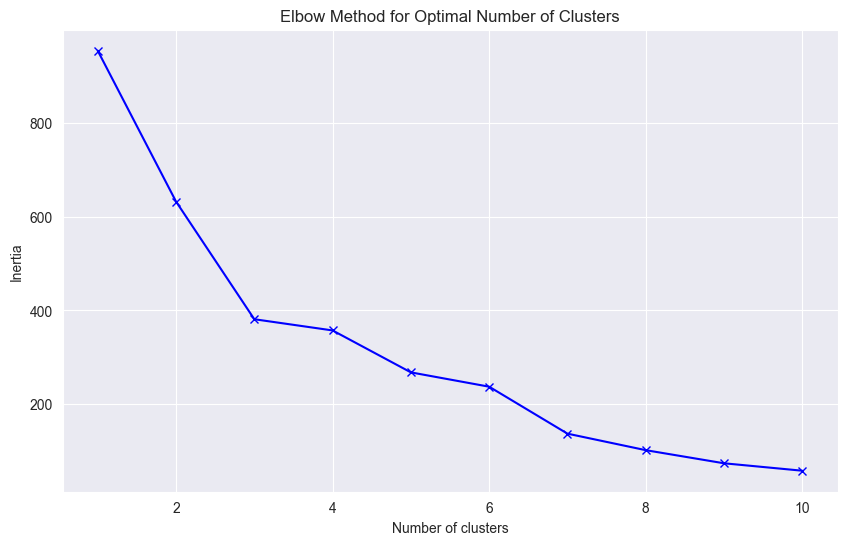

In [98]:
optimal_clusters = plot_elbow_method(comb_matrix)
labels = apply_clustering(comb_matrix, optimal_clusters)
df['Cluster'] = labels

In [158]:
print("Optimal number of clusters:", optimal_clusters)
print("Cluster labels:\n", labels)

Optimal number of clusters: 4
Cluster labels:
 [1 7 5 8 1 9 5 5 7 7 4 6 6 7 0 8 7 6 5 7 4 1 6 2 7 7 8 4 9 6 4 6 2 5 5 4 1
 5 4 3 7 2 7 1 6 8 5 5 8 7 5 1 0 5 2 6 6 9 1 2 9 5 4 3 6 6 4 6 5 4 3 1 2 5
 8 3 7 7 4 5 1 0 0 5 1 8 7 1 0 1 5 5 5 0 5 5 7 4 3 3 7 7 4 0 3 7 6 2 6 3 6
 0 8 7 2 1 6 7 4 9 8 1 8 8 1 7 1 6 4 6 8 0 0 1 6 6 4 9 6 0 6 3 3 5 6 3 8 5
 4 6 0 3 6 2 0 7 1 8 1 1 9 7 6 2 8 3 4 7 7 9 2 0 8 5 0 6 2 2 0 0 6 1 4 3 0
 4 4 2 7 7 5 6 7 4 7 5 2 3 6 9 1 5 6 7 1 6 1 6 0 2 1 0 5 0 4 2 1 3 2 6 9 4
 9 0 6 8 2 0 7 1 2 8 1 0 8 1 8 0 7 2 4 3 9 5 8 5 2 0 4 1 5 6 0 0 7 7 7 0 1
 4 2 1 2 7 6 4 0 2 7 7 9 0 4 3 9 1 4 4 1 6 4 4 8 4 3 2 6 6 9 7 0 9 8 6 6 7
 0 1 7 1 9 0 2 8 6 5 2 1 1 2 4 2 7 7 1 2 5 9 8 0 1 0 4 1 1 8 8 0 3 3 4 6 3
 2 8 3 1 1 0 1 1 1 2 6 0 5 7 9 9 5 2 4 8 5 0 7 0 4 2 5 0 2 6 1 0 8 6 5 7 1
 4 2 9 2 4 4 2 5 6 9 3 6 1 6 8 9 3 2 0 7 2 3 6 9 1 4 9 5 6 7 7 6 4 1 1 0 7
 0 1 5 8 9 8 4 4 4 6 2 6 8 0 6 2 7 1 8 6 7 9 2 9 6 8 9 7 9 5 1 2 9 2 6 1 0
 0 2 4 3 6 4 8 1 2 8 3 7 5 5 6 7 7 4 5 7 3 5 6 6 8 9 

In [100]:
def calculate_cluster_averages(data, labels):
    """
    Calculates the average ratings for each feature within each cluster.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    
    Returns:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    """
   
    data['cluster'] = labels
    
    # Calculate the average ratings for each feature within each cluster
    cluster_averages = data.groupby('cluster').mean().drop(columns='cluster', errors='ignore')
    
    return cluster_averages

In [101]:
# Step 5: Identify common strengths in each cluster
def identify_common_strengths(cluster_averages):
    """
    Identifies common strengths in each cluster by checking if the average rating for a feature in a cluster 
    is above a certain threshold.
    
    Parameters:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    
    Returns:
    - common_strengths (DataFrame): A DataFrame indicating whether each feature is a common strength in each cluster.
    """
    # Identify common strengths by checking if the average rating is >= X
    threshold = 0.0 #FIXME: Determine optimal threshold for clustering strengths
    common_strengths = (cluster_averages >= threshold)
    
    return common_strengths


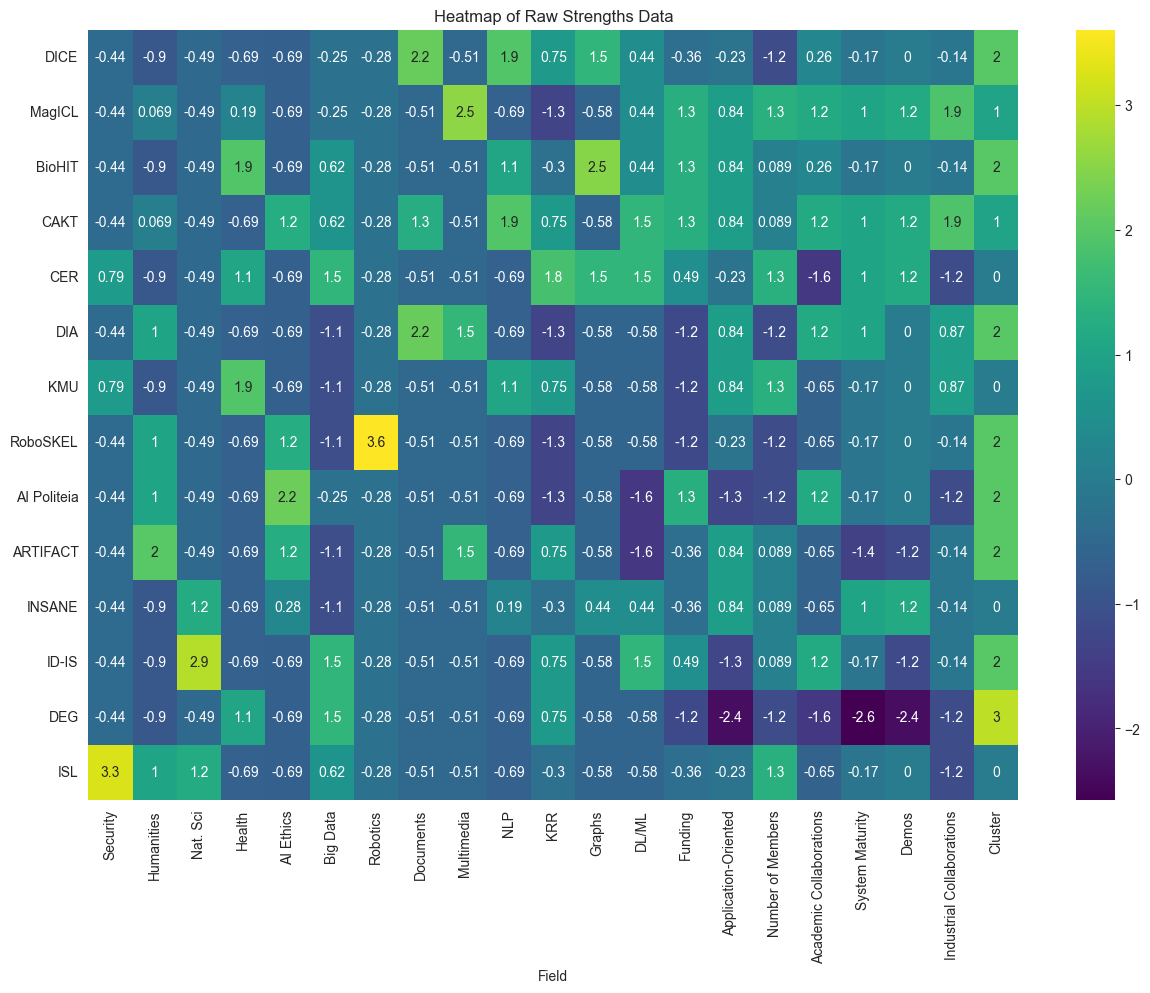

In [64]:
plt.figure(figsize=(15, 10))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of Raw Strengths Data')
plt.show()

In [65]:
industry_scores = calculate_pairwise_similarity(df)

complementary_scores = calculate_complementary_scores(df)

combined_scores = combine_scores(industry_scores,complementary_scores, alpha=0.5)

Shape of the filtered data: (14, 6)


In [291]:
def similarity_visual(scores):
    """
    Visualizes the clustering results based on the similarity scores.
    
    Parameters:
    - scores (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    
    This function applies clustering, calculates cluster averages, identifies common strengths,
    and visualizes the results using heatmaps.
    """
    
    
    #num_clusters = 5: Define the number of clusters
    optimal_clusters = plot_elbow_method(scores)
    labels_ind = apply_clustering(scores, optimal_clusters)
    df['cluster'] = labels_ind  # Ensure df is the preprocessed DataFrame
  
    cluster_averages = calculate_cluster_averages(df, labels_ind)
    
    common_strengths = identify_common_strengths(cluster_averages)
    

    print("Cluster Average Ratings:")
    print(cluster_averages)
    
    print("Common Strengths in Clusters:")
    print(common_strengths)
    
    common_strengths_t = common_strengths.T
    
    # Plot common strengths
    plt.figure(figsize=(15, 8))
    sns.heatmap(common_strengths_t, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Common Strengths in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Feature')
    plt.show()
    
    # Plot heatmap of cluster averages
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_averages, annot=True, cmap='viridis')
    plt.title('Heatmap of Cluster Averages')
    plt.show()


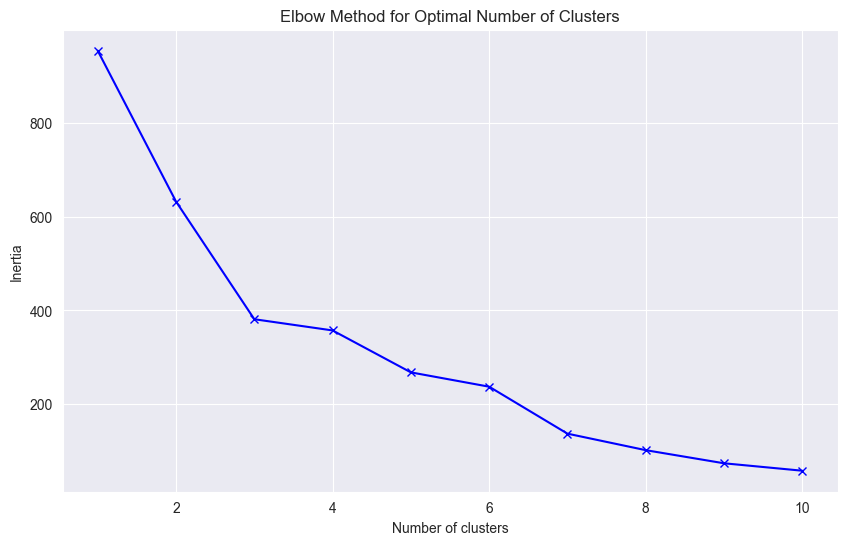

Cluster Average Ratings:
Field    Security  Humanities      Nat. Sci    Health  AI Ethics  Big Data  \
cluster                                                                      
0        1.100564   -0.415029  3.638034e-01  0.405459  -0.450694 -0.030773   
1       -0.440225    0.069171 -4.850713e-01 -0.249513   0.277350  0.184637   
2       -0.440225    0.345857  6.344132e-17 -0.311891   0.277350 -0.246183   
3       -0.440225   -0.899229 -4.850713e-01  1.060431  -0.693375  1.477098   

Field    Robotics  Documents  Multimedia       NLP       KRR    Graphs  \
cluster                                                                  
0        -0.27735  -0.512148   -0.509175 -0.031189  0.484481  0.182331   
1        -0.27735   0.384111    1.018350  0.623783 -0.298142 -0.583460   
2         0.27735   0.256074    0.072739 -0.062378 -0.298142  0.145865   
3        -0.27735  -0.512148   -0.509175 -0.686161  0.745356 -0.583460   

Field       DL/ML       Funding  Application-Oriented  Number

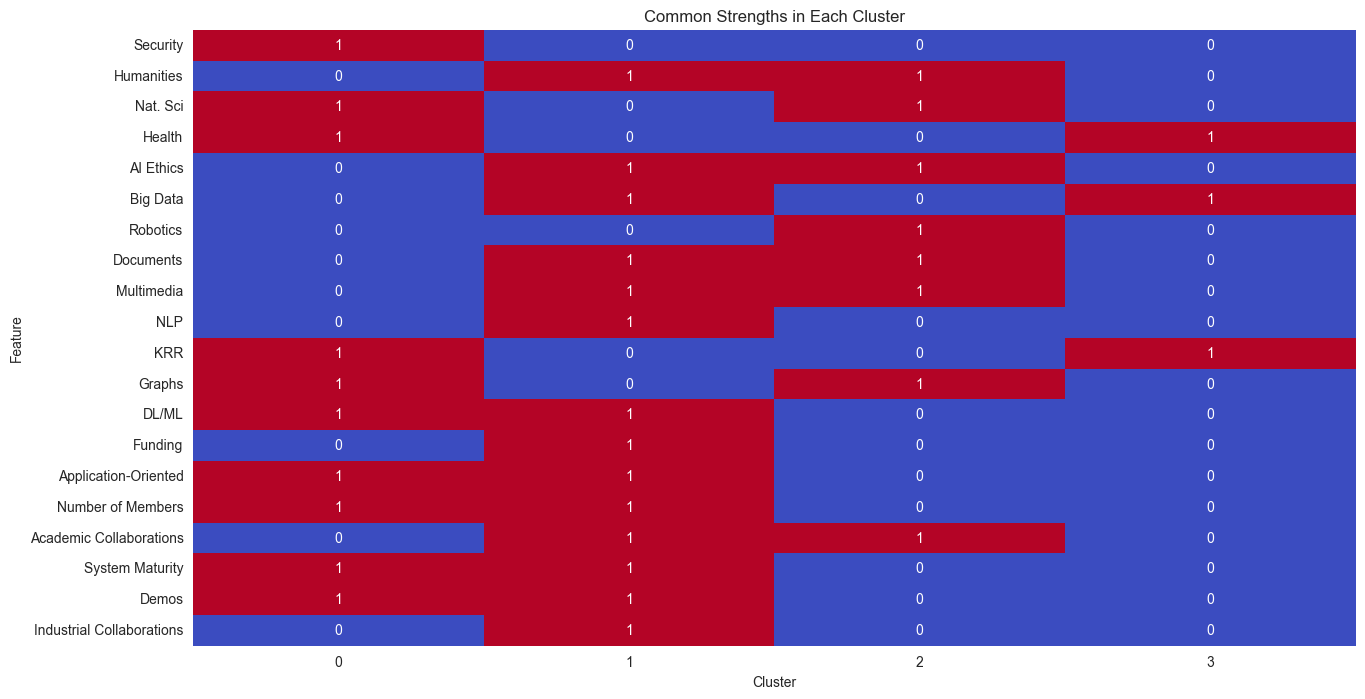

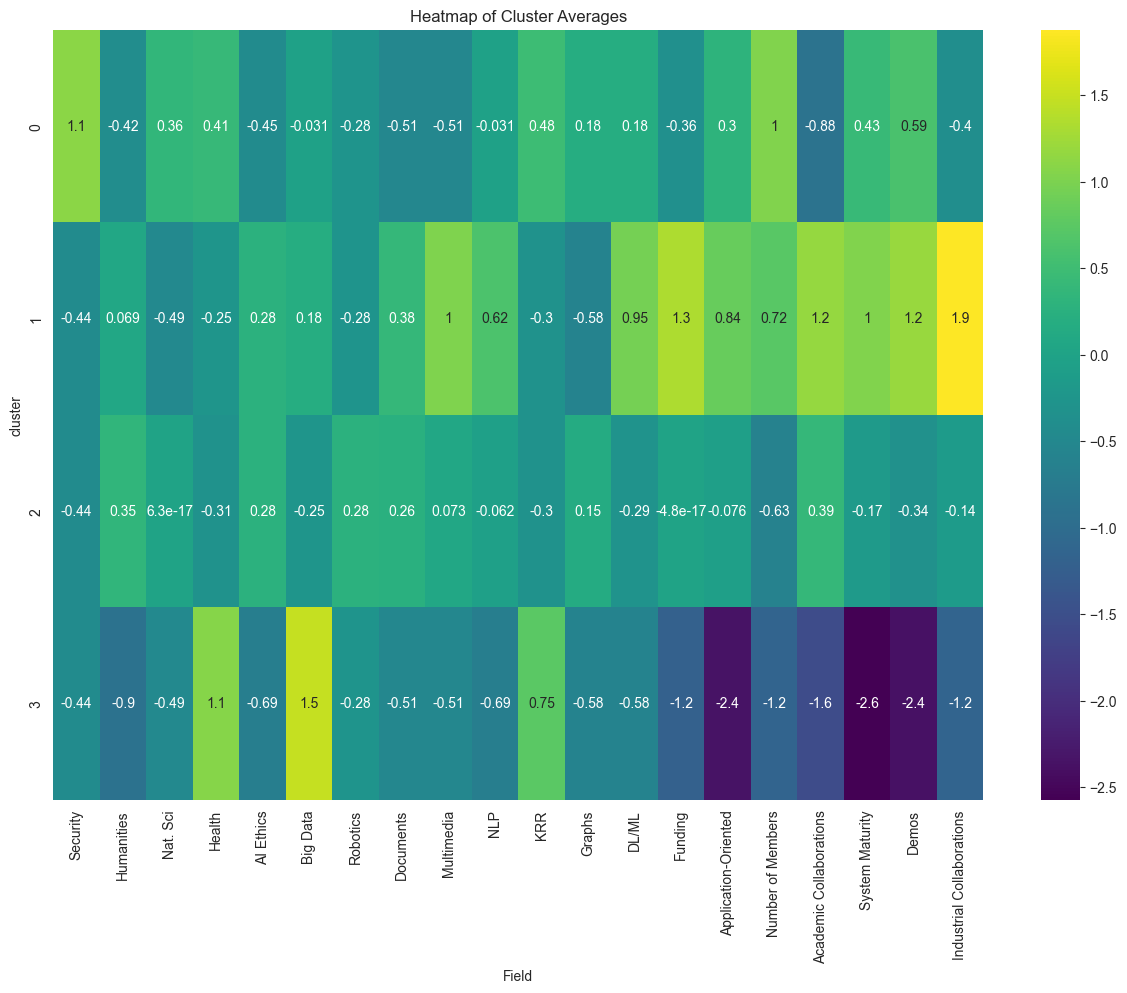

In [292]:
similarity_visual(combined_scores)

In [102]:
# Generate profiles for each cluster
def profile_clusters(df):
    """
    Generates statistical profiles for each cluster.

    This function groups the DataFrame by the 'cluster' column and calculates
    the mean, standard deviation, minimum, and maximum for each feature within
    each cluster.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data, including a 'cluster' column.

    Returns:
    - profiles (DataFrame): A DataFrame with the mean, standard deviation, minimum, and maximum
                            values for each feature within each cluster.
    """
    
    profiles = df.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
    return profiles

cluster_profiles = profile_clusters(df)
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
Field    Security                               Humanities            \
             mean       std       min       max       mean       std   
Cluster                                                                
0        1.100564  1.551027 -0.440225  3.257668  -0.415029  0.968400   
1       -0.440225  0.000000 -0.440225 -0.440225   0.069171  0.000000   
2       -0.440225  0.000000 -0.440225 -0.440225   0.345857  1.213954   
3       -0.440225       NaN -0.440225 -0.440225  -0.899229       NaN   

Field                            Nat. Sci            ... System Maturity  \
              min       max          mean       std  ...             min   
Cluster                                              ...                   
0       -0.899229  1.037572  3.638034e-01  0.980196  ...       -0.171499   
1        0.069171  0.069171 -4.850713e-01  0.000000  ...        1.028992   
2       -0.899229  2.005972  6.344132e-17  1.283378  ...       -1.371989   
3       -0.899229 -0.

In [67]:
df.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,...,Graphs,DL/ML,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations,Cluster
DICE,-0.440225,-0.899229,-0.485071,-0.686161,-0.693375,-0.246183,-0.27735,2.176627,-0.509175,1.933727,...,1.458650,0.437595,-0.363803,-0.228086,-1.162755,0.260378,-0.171499,0.000000,-0.144338,2
MagICL,-0.440225,0.069171,-0.485071,0.187135,-0.693375,-0.246183,-0.27735,-0.512148,2.545875,-0.686161,...,-0.583460,0.437595,1.333946,0.836315,1.341641,1.171700,1.028992,1.183216,1.876388,1
BioHIT,-0.440225,-0.899229,-0.485071,1.933727,-0.693375,0.615457,-0.27735,-0.512148,-0.509175,1.060431,...,2.479705,0.437595,1.333946,0.836315,0.089443,0.260378,-0.171499,0.000000,-0.144338,2
CAKT,-0.440225,0.069171,-0.485071,-0.686161,1.248075,0.615457,-0.27735,1.280369,-0.509175,1.933727,...,-0.583460,1.458650,1.333946,0.836315,0.089443,1.171700,1.028992,1.183216,1.876388,1
CER,0.792406,-0.899229,-0.485071,1.060431,-0.693375,1.477098,-0.27735,-0.512148,-0.509175,-0.686161,...,1.458650,1.458650,0.485071,-0.228086,1.341641,-1.562267,1.028992,1.183216,-1.154701,0


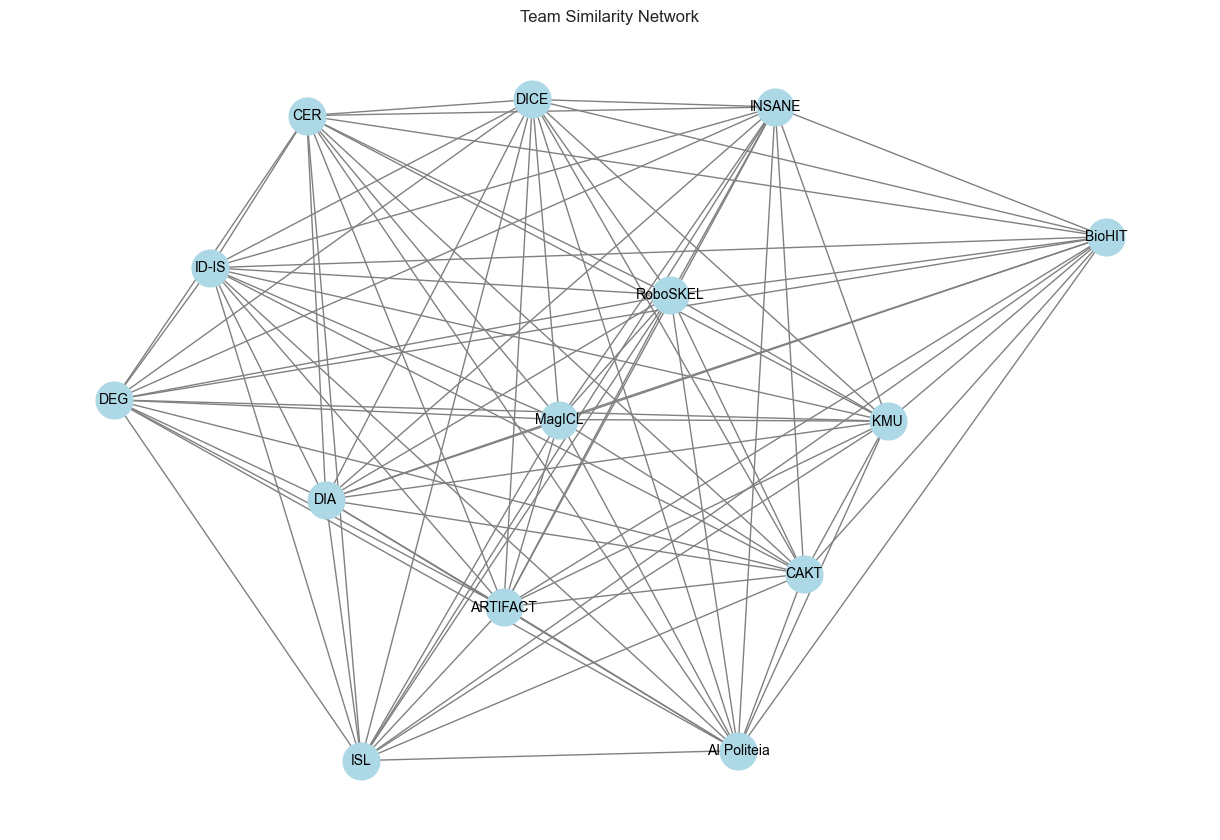

In [103]:
#Network Analysis
    #Nodes---> Team
    #Edges--->Similarities/Potential merges

import networkx as nx

import matplotlib.pyplot as plt

"""
    Plots a network graph representing the similarity between teams.

    This function creates a network graph where each node represents a team, and each edge
    represents the similarity between two teams. Only edges with positive similarity values
    are included.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data. The index should contain team names.
    - similarity_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.

    Returns:
    - None
    """

def plot_team_network(df, similarity_matrix):
    G = nx.Graph()
    
    # Add nodes
    for team in df.index:
        G.add_node(team)
    
    # Add edges
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if similarity_matrix[i, j] > 0:  # Only add edges with positive similarity
                G.add_edge(df.index[i], df.index[j], weight=similarity_matrix[i, j])
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title('Team Similarity Network')
    plt.show()

# Main execution for network analysis
plot_team_network(df, industry_scores)


Synthetic Data Unsupervised Learning Modeling
-Generate synthetic dataset
-Cluster and label data
-Model training and cross validation
-Use labeled dataset to test accuracy and overfitting